In [ ]:
%pip install factor-analyzer semopy pandas

In [1]:
import pandas as pd
import numpy as np

In [15]:
df_res = pd.read_excel("df_res.xlsx")

value_cols = [
    c for c in df_res.columns if "cum_norm" in c or "idade_posse_norm" in c #and "w" in c
]
df_raw = df_res.loc[:, value_cols]

In [11]:
rename_dict = {
    "idade_posse_norm": "Idade Posse",
    "w_tempo_atuacao_percent_cum_norm": "Tempo de Atuação",
    "w_mesa_1_cum_norm": "Mesa 1",
    "w_mesa_2_cum_norm": "Mesa 2",
    "w_relatorias_ln_cum_norm": "Relatorias",
    "w_pos_lider_cum_norm": "Liderança",
    "w_pos_comiss_pr_cum_norm": "Comissão",
    "w_mand_dep_estadual_cum_norm": "Mandatos (DE)",
    "w_mand_ver_cum_norm": "Mandatos (VER)",
    "w_mand_sen_cum_norm": "Mandatos (SEN)",
    "w_fid_municipais_cum_norm": "Fidelidade (municipais)",
    "w_fid_gerais_cum_norm": "Fidelidade (gerais)",
}

df = df_raw.rename(rename_dict, axis=1)
df_gt_50_all = df_res[df_res['idLegislatura'] > 50].reset_index(drop=True)
df_gt_50 = df_gt_50_all.loc[:,value_cols].rename(rename_dict, axis=1)

In [14]:
df_raw

,idade_posse_norm,mesa_1_cum_norm,mesa_2_cum_norm,pos_lider_cum_norm,pos_comiss_pr_cum_norm,fid_municipais_cum_norm,fid_gerais_cum_norm,tempo_atuacao_percent_cum_norm,mand_dep_estadual_cum_norm,mand_ver_cum_norm,...,w_mesa_1_cum_norm,w_mesa_2_cum_norm,w_pos_lider_cum_norm,w_pos_comiss_pr_cum_norm,w_relatorias_ln_cum_norm,w_mand_dep_estadual_cum_norm,w_mand_ver_cum_norm,w_mand_sen_cum_norm,w_fid_municipais_cum_norm,w_fid_gerais_cum_norm
0,0.385542,0.0,0.0,0.0,0.0,0.111111,0.0,0.943396,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.151600,0.000000,0.000000,0.0,0.111111,0.0
1,0.433735,0.0,0.0,0.0,0.0,0.111111,0.0,0.943396,0.285714,0.166667,...,0.0,0.0,0.0,0.0,0.000000,0.057143,0.016667,0.0,0.111111,0.0
2,0.361446,0.0,0.0,0.0,0.0,0.111111,0.0,0.943396,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.111111,0.0
3,0.216867,0.0,0.0,0.0,0.0,0.111111,0.0,0.943396,0.285714,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.057143,0.000000,0.0,0.111111,0.0
4,0.228916,0.0,0.0,0.0,0.0,0.111111,0.0,0.943396,0.000000,0.166667,...,0.0,0.0,0.0,0.0,0.240281,0.000000,0.016667,0.0,0.111111,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6245,0.457831,0.0,0.0,0.0,0.0,0.111111,0.0,0.113208,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.111111,0.0
6246,0.506024,0.0,0.0,0.0,0.0,0.111111,0.0,0.103774,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.111111,0.0
6247,0.253012,0.0,0.0,0.0,0.0,0.111111,0.0,0.103774,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.111111,0.0
6248,0.409639,0.0,0.0,0.0,0.0,0.111111,0.0,0.094340,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.111111,0.0


# Análise fatorial

In [4]:
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot  as plt

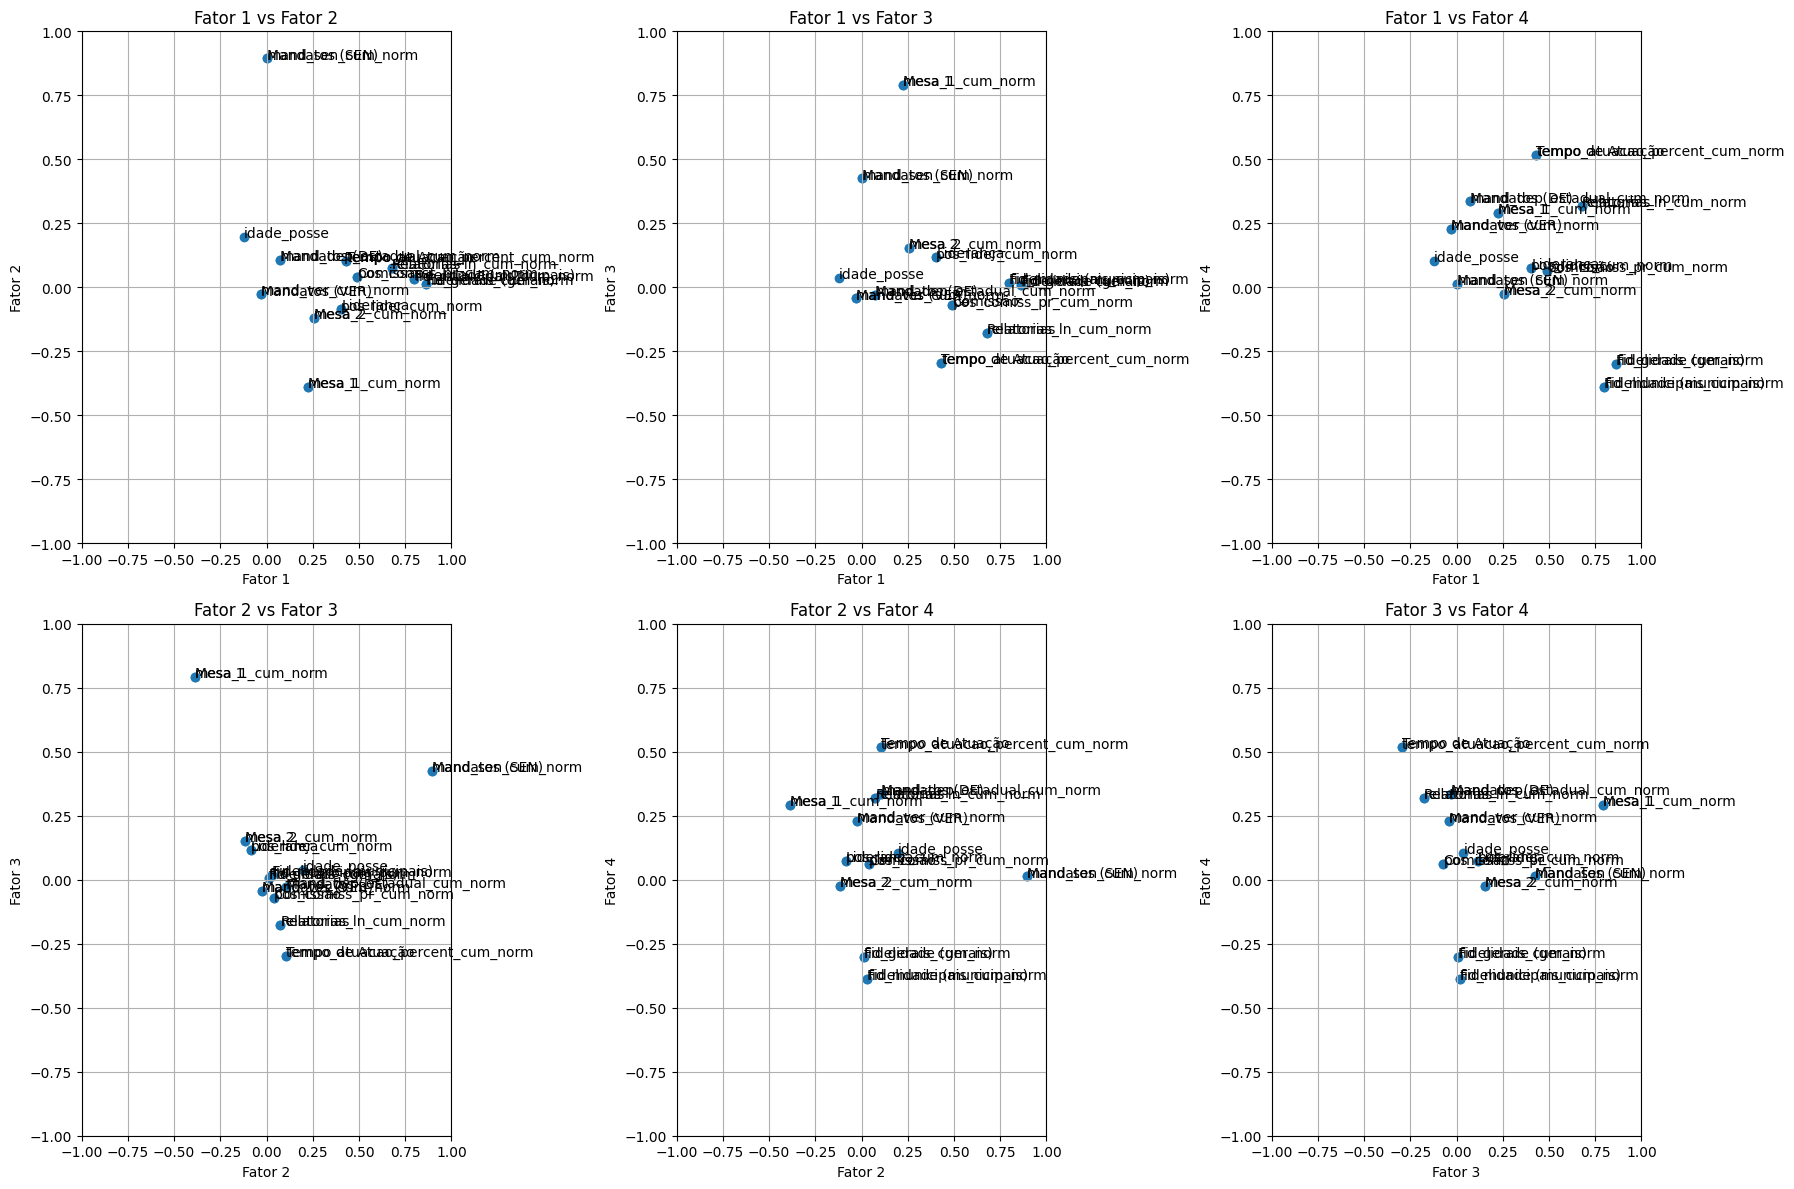

In [5]:
from itertools import combinations
import math

df = df_res[df_res['idLegislatura'] > 50].reset_index(drop=True).loc[:,value_cols].rename(rename_dict, axis=1)
# Definir o número de fatores como uma variável
n_factors = 4

# Análise Fatorial
fa = FactorAnalyzer(n_factors=n_factors, rotation=None)
fa.fit(df)

# Obter as cargas fatoriais
loadings = fa.loadings_

# Gerar todas as combinações possíveis de biplots para os fatores
factor_pairs = list(combinations(range(n_factors), 2))
n_pairs = len(factor_pairs)

# Configurar a disposição do grid: sempre 3 colunas
n_cols = 3
n_rows = math.ceil(n_pairs / n_cols)

# Criar múltiplos gráficos 2D para cada par de fatores
fig, axs = plt.subplots(n_rows, n_cols, figsize=(18, 6 * n_rows))

# Achatar o array de axs para facilitar o loop
x_min, x_max = -1.0, 1.0
y_min, y_max = -1.0, 1.0
axs = axs.flatten()

for i, (factor1, factor2) in enumerate(factor_pairs):
    axs[i].scatter(loadings[:, factor1], loadings[:, factor2])
    for j, var in enumerate(df.columns):
        axs[i].text(loadings[j, factor1], loadings[j, factor2], var)
    axs[i].set_xlim(x_min, x_max)
    axs[i].set_ylim(y_min, y_max)
    axs[i].set_xlabel(f'Fator {factor1 + 1}')
    axs[i].set_ylabel(f'Fator {factor2 + 1}')
    axs[i].set_title(f'Fator {factor1 + 1} vs Fator {factor2 + 1}')
    axs[i].grid()

# Desativar gráficos vazios, caso haja
for k in range(i + 1, len(axs)):
    fig.delaxes(axs[k])

plt.tight_layout()
plt.show()

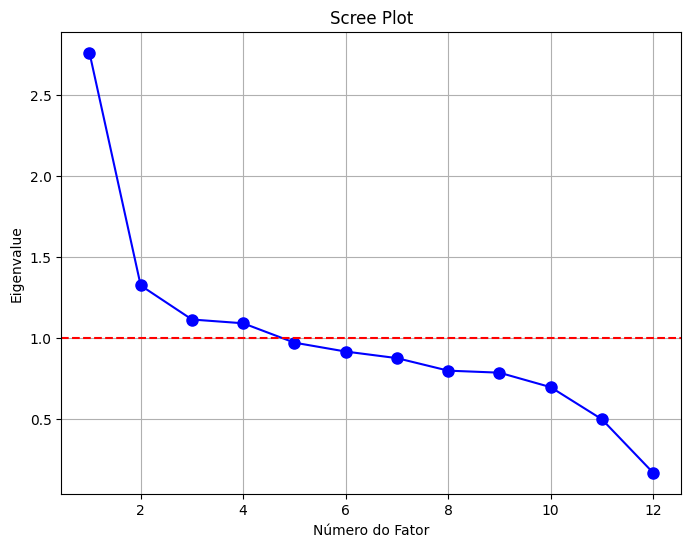

In [8]:
fa = FactorAnalyzer(rotation=None)
fa.fit(df_gt_50)

# Obter eigenvalues
eigenvalues, _ = fa.get_eigenvalues()

# Criar Scree Plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, 'o-', markersize=8, color='blue')
plt.title('Scree Plot')
plt.xlabel('Número do Fator')
plt.ylabel('Eigenvalue')
plt.axhline(y=1, color='r', linestyle='--')  # Linha de corte em Eigenvalue = 1
plt.grid()
plt.show()

In [43]:
fa = FactorAnalyzer(n_factors=3, rotation='varimax')

# Ajustar o modelo aos dados
fa.fit(df_gt_50)

# Ver os fatores
loadings = fa.loadings_

factors = np.dot(df_gt_50, loadings)

# Converter o resultado em DataFrame para visualização
factors_df = pd.DataFrame(factors, columns=['Fator 1', 'Fator 2', 'Fator 3'])

# Exibir as 3 dimensões calculadas
print(factors_df)

       Fator 1   Fator 2   Fator 3
0     2.723925  2.298346  2.973531
1     2.146444  1.733604  3.036711
2     3.381728  2.870849  2.358481
3     3.281365  2.850774  2.357883
4     2.862339  2.649171  2.124223
...        ...       ...       ...
4401  0.222026  0.055239  0.017056
4402  0.098928  0.019853  0.002296
4403  0.099462  0.016261  0.000833
4404  0.105708  0.021304 -0.015142
4405  0.099462  0.016261  0.000833

[4406 rows x 3 columns]


In [52]:
df_calc = df_gt_50_all.join(factors_df)

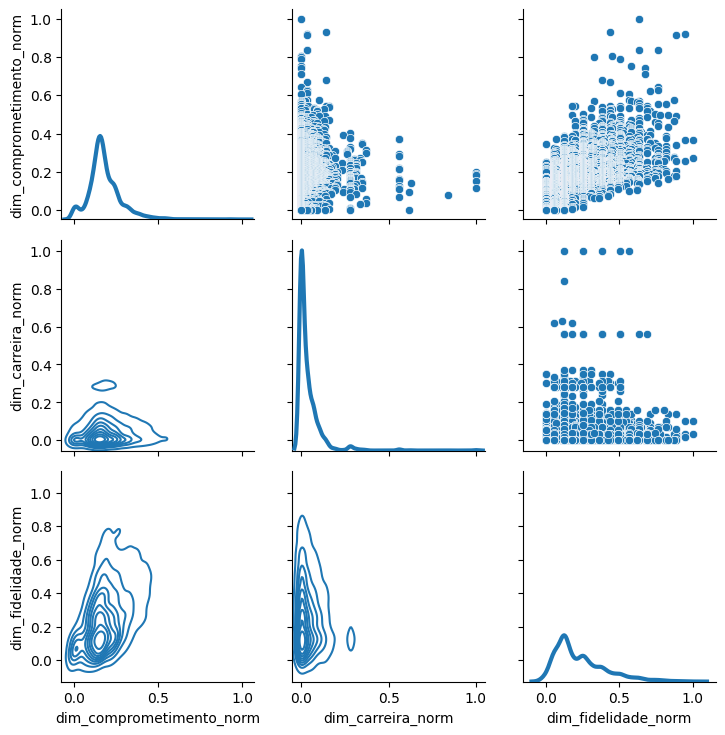

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# g = sns.PairGrid(df_calc[['Fator 1', 'Fator 2', 'Fator 3']])
# g.map_upper(sns.scatterplot)
# g.map_lower(sns.kdeplot)
# g.map_diag(sns.kdeplot, lw=3, legend=False)

g = sns.PairGrid(df_calc[ ['dim_comprometimento_norm', 'dim_carreira_norm', 'dim_fidelidade_norm']])
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=3, legend=False)

# Análise fatorial confirmatória

In [9]:
import pandas as pd
from semopy import Model
from semopy import Optimizer

In [16]:
# Define the model structure
model_desc = """
# Latent variables
Factor1 =~ w_tempo_atuacao_percent_cum_norm + w_mesa_1_cum_norm + w_mesa_2_cum_norm + w_relatorias_ln_cum_norm + w_pos_lider_cum_norm + w_pos_comiss_pr_cum_norm
Factor2 =~ w_mand_dep_estadual_cum_norm + w_mand_ver_cum_norm + w_mand_sen_cum_norm
Factor3 =~ w_fid_municipais_cum_norm + w_fid_gerais_cum_norm


"""
# # Covariance (optional)
# Factor1 ~~ Factor2

model = Model(model_desc)

model.load_dataset(df_raw)


In [17]:
# Fit the model
opt = Optimizer(model)
opt.optimize()

1.3046827665837633

In [18]:
res = model.fit(df_raw)
print(res)

Name of objective: MLW
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully
Objective value: 1.305
Number of iterations: 122
Params: 0.374 0.286 3.504 1.720 2.293 0.045 0.031 1.499 0.007 0.001 0.000 0.000 0.017 0.009 0.001 0.009 0.000 0.002 0.001 0.042 0.013 0.105 0.118 0.076 0.044


In [19]:
model.inspect()#.to_excel('cda_res.xlsx')

,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,w_tempo_atuacao_percent_cum_norm,~,Factor1,1.000000,-,-,-
1,w_mesa_1_cum_norm,~,Factor1,0.373605,0.036291,10.294746,0.0
2,w_mesa_2_cum_norm,~,Factor1,0.285920,0.021268,13.443865,0.0
3,w_relatorias_ln_cum_norm,~,Factor1,3.503597,0.133301,26.283404,0.0
4,w_pos_lider_cum_norm,~,Factor1,1.719912,0.083302,20.646642,0.0
5,w_pos_comiss_pr_cum_norm,~,Factor1,2.292723,0.097325,23.557484,0.0
6,w_mand_dep_estadual_cum_norm,~,Factor2,1.000000,-,-,-
7,w_mand_ver_cum_norm,~,Factor2,0.045107,0.105192,0.428809,0.668062
8,w_mand_sen_cum_norm,~,Factor2,0.031470,0.075358,0.417612,0.676231
9,w_fid_municipais_cum_norm,~,Factor3,1.000000,-,-,-


# graphs

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

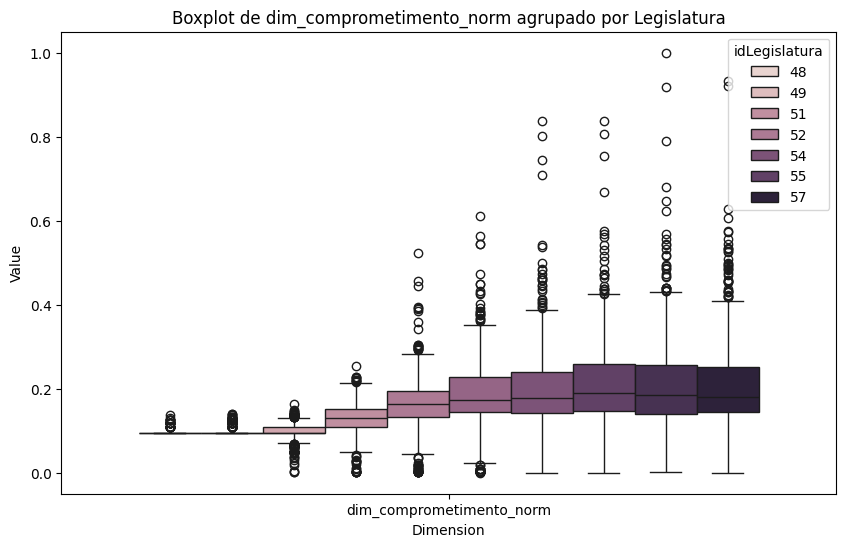

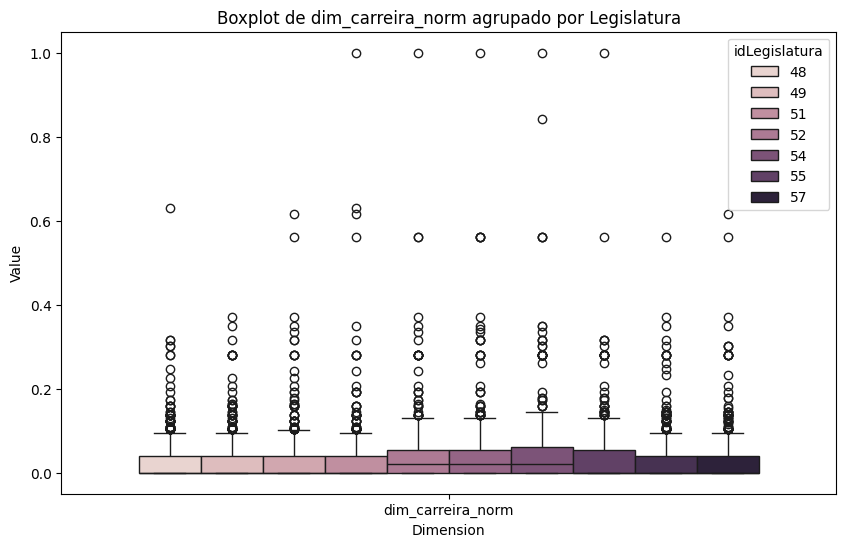

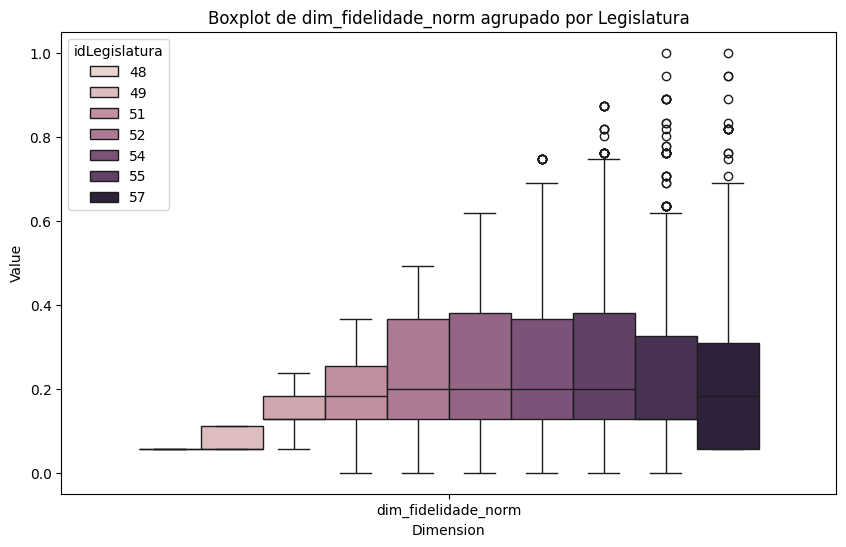

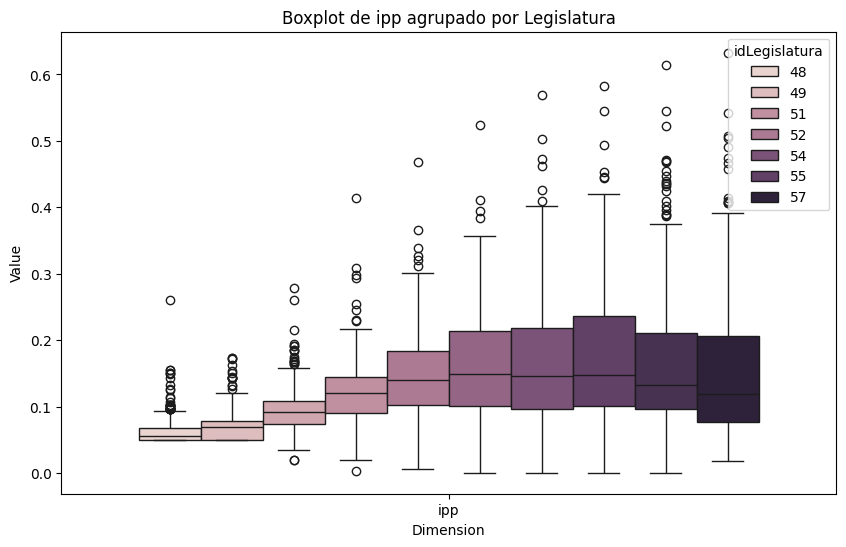

In [36]:
columns = ['dim_comprometimento_norm', 'dim_carreira_norm', 'dim_fidelidade_norm', 'ipp']

for c in columns:
    df_melted = df_res.melt(id_vars='idLegislatura', value_vars=[c], var_name='Dimension', value_name='Value')

    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Dimension', y='Value', hue='idLegislatura', data=df_melted)
    plt.title(f'Boxplot de {c} agrupado por Legislatura')
    plt.savefig(f'boxplot_{c}.png', dpi=300, bbox_inches='tight')
    plt.show()